In [1]:
"""
Tests para evaluar uniformidad e independencia de los generadores de números aleatorios

Pueden ser:
• Teóricos: los que trabajan con la expresión del generado, para evaluar a los generados si los
números que generaría son uniformes e independientes
• Empíricos: aquellos que trabajan con los números obtenidos del generador para verificar
esas propiedades.
"""

from random import random
import statistics
import scipy
import scipy.stats as ss
from scipy.stats import chisquare
import matplotlib.pyplot as plt

#Para conectar con API de random.org
import requests
import json

import math
from scipy.stats import norm 

In [2]:
######## PUNTO 1 ########

#Vamos a generar 10000 números aleatorios
n = 10000
def aleatorio():
    return random()

lista_num = []
for i in range(n):
    lista_num.append(aleatorio())

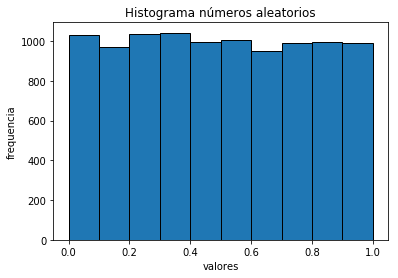

Frecuencia absoluta intervalos: [1032.  972. 1034. 1042.  993. 1006.  948.  991.  994.  988.]
Cantidad intervalos:  10


In [3]:
#Vamos a probar el Test empírico de Chi-cuadrado

frec_absoluta,x,c = plt.hist(lista_num, edgecolor = 'black')
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma números aleatorios')
plt.show()

print('Frecuencia absoluta intervalos:',frec_absoluta)
k = len(frec_absoluta)
print('Cantidad intervalos: ',k)

In [4]:
#Frecuencias esperadas
frec_esp = []
for i in range(k):
    frec_esp.append(n/k)
    
#Calculamos la variable de chi cuadrado
print('Valor chi cuadrado de la muestra:',chisquare(frec_absoluta, f_exp = frec_esp))

Valor chi cuadrado de la muestra: Power_divergenceResult(statistic=7.778, pvalue=0.5566641579873239)


In [5]:
######## PUNTO 2 ########

#Vamos a generar 10000 con GCL
Z0 = 7
m = 2**35
a = 5**15
c = 3

def generador_congruencial(zi_menos1, m, a, c):
    zi = (a*zi_menos1+c) % m
    return zi

zi_menos1 = Z0
lista_gcl = []
for i in range(1,n+1):
    Zi = generador_congruencial(zi_menos1,m,a,c)
    zi_menos1 = Zi
    Ui = Zi/m
    lista_gcl.append(Ui)

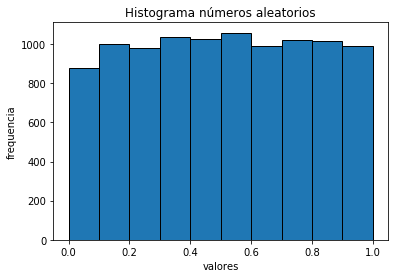

Frecuencia absoluta intervalos: [ 880. 1001.  978. 1037. 1027. 1058.  992. 1019. 1018.  990.]
Cantidad intervalos:  10


In [6]:
#Vamos a probar el Test empírico de Chi-cuadrado

frec_absoluta_gcl,x,c = plt.hist(lista_gcl, edgecolor = 'black')
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma números aleatorios')
plt.show()

print('Frecuencia absoluta intervalos:',frec_absoluta_gcl)
k = len(frec_absoluta_gcl)
print('Cantidad intervalos: ',k)

In [7]:
#Frecuencias esperadas
frec_esp_gcl = []
for i in range(k):
    frec_esp_gcl.append(n/k)
    
#Calculamos la variable de chi cuadrado
print('Valor chi cuadrado de la muestra:',chisquare(frec_absoluta_gcl, f_exp = frec_esp_gcl))

Valor chi cuadrado de la muestra: Power_divergenceResult(statistic=21.196000000000005, pvalue=0.011808016253107335)


In [8]:
######## PUNTO 3 ########

#Vamos a conectarnos con un get a la api de random.org para generar los valores
url = 'https://www.random.org/decimal-fractions/?num=10000&dec=10&col=1&format=plain&rnd=new'

response = requests.get(url).text

print(response)

0.3922096140
0.4683214981
0.8789388741
0.2176026789
0.3759826227
0.6109567931
0.9061534568
0.7526551639
0.8282229094
0.7615678219
0.4223596317
0.8577694757
0.7462252666
0.4046353649
0.0687816258
0.2908058935
0.5670167768
0.4067857273
0.7483388743
0.6630536999
0.3975121748
0.1017606730
0.2548026743
0.5649799785
0.4559185147
0.2599536821
0.8282665141
0.8815042535
0.7512846361
0.7176926299
0.2627437864
0.1192285437
0.5616751924
0.4494687702
0.3226798171
0.4254172770
0.4514748301
0.4083677384
0.4907885737
0.6935092987
0.7272904558
0.8548822505
0.5493153641
0.8488877032
0.2853870873
0.8854607503
0.8980814287
0.9881700915
0.4976255455
0.5090528303
0.0602431580
0.1205574342
0.7275347507
0.6303078151
0.2125012072
0.5428700746
0.9512146461
0.8057217267
0.4409829815
0.2162501413
0.9135850276
0.6690264153
0.8330220646
0.8643535263
0.2003457416
0.7359850708
0.1204455813
0.2870069741
0.4262308327
0.8979137149
0.3728775254
0.1405480102
0.5706436940
0.3443716260
0.1331271697
0.9197171875
0.1236718545

In [9]:
lista_random_org = []
for i in response.split("\n"):
    try:
        lista_random_org.append(float(i))
    except:
        pass
#print(lista_random_org,len(lista_random_org))

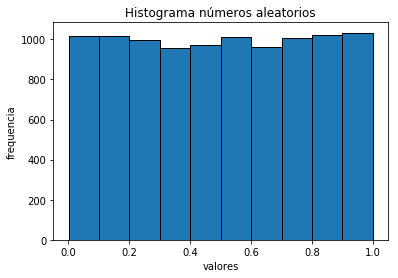

Frecuencia absoluta intervalos: [1016. 1019.  997.  957.  973. 1014.  962. 1009. 1020. 1033.]
Cantidad intervalos:  10


In [10]:
#Vamos a probar el Test empírico de Chi-cuadrado

frec_absoluta_random_org,x,c = plt.hist(lista_random_org, edgecolor = 'black')
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma números aleatorios')
plt.show()

print('Frecuencia absoluta intervalos:',frec_absoluta_random_org)
k = len(frec_absoluta_random_org)
print('Cantidad intervalos: ',k)

In [11]:
#Frecuencias esperadas
frec_esp_random_org = []
for i in range(k):
    frec_esp_random_org.append(n/k)
    
#Calculamos la variable de chi cuadrado
print('Valor chi cuadrado de la muestra:',chisquare(frec_absoluta_random_org, f_exp = frec_esp_random_org))

Valor chi cuadrado de la muestra: Power_divergenceResult(statistic=6.414, pvalue=0.6978741775089305)


In [43]:
#Vamos a identificar subsecuencias crecientes y contínuas
def calcular_subsecuencias(lista):
    subsecuencias_menor_5 = 0
    subsecuencias_mayor_6 = 0
    n = len(lista)
    for i in range(n-1):
        cant = 0
        if lista[i] < lista[i+1]:
            j = i
            while lista[j] < lista[j+1] and j < n-2:
                cant += 1
                j+=1
            if cant <= 5:
                subsecuencias_menor_5 += 1
            else:
                subsecuencias_mayor_6 +=1
            i = j
    print('Cantidas de subsecuencias crecientes de longitud <= 5:',subsecuencias_menor_5)
    print('Cantidas de subsecuencias crecientes de longitud >= 6:',subsecuencias_mayor_6)
    total_corridas = subsecuencias_menor_5 + subsecuencias_mayor_6
    print('Total de subsecuencias corridas:',total_corridas)
    
    H0 = "los números generados son independientes"
    H1 = "los números generados no son independientes"
    print('\nHipótesis 0:',H0)
    print('\nHipótesis 1:',H1)
    
    #Calculamos media y varianza del total de corridas

    #tomamos alfa
    alfa = 0.05
    alfa_2 = alfa/2
    print('\nAlfa:',alfa)
    print('Alfa sobre 2:',alfa_2)
    Za2 =  1.96 #Z alfa/2
    print('Z alfa sobre 2:',Za2)
    
    mu = (2*n-1)/3
    print('Esperanza:',mu)
    sigma2 = (16*n-29)/90
    print('Varianza:',sigma2)
    sigma = math.sqrt(sigma2)
    print('Desvío:',sigma,'\n')

    #Si n > 0, por el TCL, la distribución se aproxima a una normal N(0,1)
    Z0 = abs((total_corridas-mu)/sigma)
    print('Z0:', Z0)
   
    if Z0 < Za2:
        generador_independiente = True
        print('\nNo se puede rechazar la hipótesis de que los datos son independientes')
    else:
        generador_independiente = False
        print('\nSe tiene evidencia de que los datos son dependientes, se rechaza el generador')
    #return generador_independiente

In [44]:
######## PUNTO 4 ########

calcular_subsecuencias(lista_num)

Cantidas de subsecuencias crecientes de longitud <= 5: 4999
Cantidas de subsecuencias crecientes de longitud >= 6: 0
Total de subsecuencias corridas: 4999

Hipótesis 0: los números generados son independientes

Hipótesis 1: los números generados no son independientes

Alfa: 0.05
Alfa sobre 2: 0.025
Z alfa sobre 2: 1.96
Esperanza: 6666.333333333333
Varianza: 1777.4555555555555
Desvío: 42.159880876913725 

Z0: 39.54786632820744

Se tiene evidencia de que los datos son dependientes, se rechaza el generador


In [45]:
######## PUNTO 5 ########

calcular_subsecuencias(lista_gcl)

Cantidas de subsecuencias crecientes de longitud <= 5: 5026
Cantidas de subsecuencias crecientes de longitud >= 6: 2
Total de subsecuencias corridas: 5028

Hipótesis 0: los números generados son independientes

Hipótesis 1: los números generados no son independientes

Alfa: 0.05
Alfa sobre 2: 0.025
Z alfa sobre 2: 1.96
Esperanza: 6666.333333333333
Varianza: 1777.4555555555555
Desvío: 42.159880876913725 

Z0: 38.86000859718904

Se tiene evidencia de que los datos son dependientes, se rechaza el generador


In [46]:
######## PUNTO 6 ########
calcular_subsecuencias(lista_random_org)

Cantidas de subsecuencias crecientes de longitud <= 5: 5033
Cantidas de subsecuencias crecientes de longitud >= 6: 0
Total de subsecuencias corridas: 5033

Hipótesis 0: los números generados son independientes

Hipótesis 1: los números generados no son independientes

Alfa: 0.05
Alfa sobre 2: 0.025
Z alfa sobre 2: 1.96
Esperanza: 6666.333333333333
Varianza: 1777.4555555555555
Desvío: 42.159880876913725 

Z0: 38.741412436668625

Se tiene evidencia de que los datos son dependientes, se rechaza el generador
